This code runs Deep Learning on nutau and nue samples created by Dasha.  It runs on multiple GPUs at once.

This code runs in a python 3.7 conda environment constructed as follows:
- conda create --name tf-gpu tensorflow-gpu keras scikit-learn matplotlib ipykernel nb_conda_kernels [Pillow]
- conda activate tf-gpu
(Pillow is for image manipulation for making heat maps, but I haven't got it to work yet.  Can remove from environment.)

To run with multiple GPUs on CyberLAMP you must specify the "nodes" and "gpus" qualifiers in the same chunk.  For example:
- qsub -I -A cyberlamp -l qos=cl_higpu -l nodes=1:ppn=1:gpus=4:shared -l mem=24gb -l walltime=4:00:00

In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2"

In [3]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("pdg", np.uint32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32),
        ('TotalColumnDepthCGS',np.float32),
        ('MaxAzimuth',np.float32),
        ('SelectionWeight',np.float32),
        ('InIceNeutrinoEnergy',np.float32),
        ('PowerLawIndex',np.float32),
        ('TotalPrimaryWeight',np.float32),
        ('PrimaryNeutrinoZenith',np.float32),
        ('TotalWeight',np.float32),
        ('PropagationWeight',np.float32),
        ('NInIceNus',np.float32),
        ('TrueActiveLengthBefore',np.float32),
        ('TypeWeight',np.float32),
        ('PrimaryNeutrinoType',np.float32),
        ('RangeInMeter',np.float32),
        ('BjorkenY',np.float32),
        ('MinZenith',np.float32),
        ('InIceNeutrinoType',np.float32),
        ('CylinderRadius',np.float32),
        ('BjorkenX',np.float32),
        ('InteractionPositionWeight',np.float32),
        ('RangeInMWE',np.float32),
        ('InteractionColumnDepthCGS',np.float32),
        ('CylinderHeight',np.float32),
        ('MinAzimuth',np.float32),
        ('TotalXsectionCGS',np.float32),
        ('OneWeightPerType',np.float32),
        ('ImpactParam',np.float32),
        ('InteractionType',np.float32),
        ('TrueActiveLengthAfter',np.float32),
        ('MaxZenith',np.float32),
        ('InteractionXsectionCGS',np.float32),
        ('PrimaryNeutrinoEnergy',np.float32),
        ('DirectionWeight',np.float32),
        ('InjectionAreaCGS',np.float32),
        ('MinEnergyLog',np.float32),
        ('SolidAngle',np.float32),
        ('LengthInVolume',np.float32),
        ('NEvents',np.uint32),
        ('OneWeight',np.float32),
        ('MaxEnergyLog',np.float32),
        ('InteractionWeight',np.float32),
        ('EnergyLost',np.float32)
    ]
)
info_dtype = np.dtype(                                                                                                      
    [                                                                                                                           
    ("id", id_dtype),                                                                                                       
    ("image", np.float32, (300, 60)),
    ("neutrino", particle_dtype),
    ("daughter", particle_dtype),                                                                                           
    ("energies", np.float32,(10)),                                                                                          
    ("pdgs", np.float32,(10)),                                                                                              
    ("q_tot", np.float32),
    ("cog", np.float32,(3)),                                                                                                
    ("q_st", np.float32),
    ("st_pos", np.float32,(3)),                                                                                             
    ("st_num", np.float32),
    ("distance", np.float32),                                                                                               
    ("weight", weight_dtype),                                                                                                                    
    ]
)

keys_dtype = np.dtype(  
        [
        ("passed", np.bool_),
        ("header", np.bool_),
        ("raw_data", np.bool_),
        ("weights", np.bool_),
        ("mctree", np.bool_), 
        ("cvstats", np.bool_),
        ("pulses", np.bool_)
           ]
)
w_info_dtype = np.dtype(                                                                                                                    
        [                                                                                                                                         
        ("id", id_dtype),    
        ("neutrino", particle_dtype),
        ("energy", np.float32,(10)),
        ("pdg", np.float32,(10)),
        ("weight", weight_dtype),
        ("keys", keys_dtype)
    ]
)

In [23]:
lim = 30000
lim2 = 5000
lim3 = 60000

In [24]:
#tracks = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_track.npy', mode = 'w+', dtype =info_dtype, shape=(lim,1))
#data = np.load('/fastio2/dasha/double_pulse/data_NuMuCC.npy', mmap_mode = 'r')
#tracks[0:lim] = data[0:lim]

In [25]:
dp = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_dp.npy', mode = 'w+', dtype =info_dtype, shape=(lim,1))
data = np.load('/fastio2/dasha/double_pulse/data_NuTauCC_2000.npy', mmap_mode = 'r')
dp[0:lim] = data[0:lim]

In [26]:
sp = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_sp.npy', mode = 'w+', dtype =info_dtype, shape=(lim,1))
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC_2000.npy', mmap_mode = 'r')
#data_en = np.load('/fastio2/dasha/double_pulse/data_NuENC.npy', mmap_mode = 'r')
#data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMuNC.npy', mmap_mode = 'r')
#data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTauNC.npy', mmap_mode = 'r')

sp[0:lim] = data_ec[0:lim]

In [27]:
#data_t = np.load('/fastio2/dasha/double_pulse/data_track.npy', mmap_mode = 'r')
data_s = np.load('/fastio2/dasha/double_pulse/data_sp.npy', mmap_mode = 'r')
data_d = np.load('/fastio2/dasha/double_pulse/data_dp.npy', mmap_mode = 'r')


In [28]:
#print(np.max(data_t['image'][0]), data_t['neutrino']['energy'][0])
print(np.max(data_s['image'][0]), data_s['neutrino']['energy'][0])
print(np.max(data_d['image'][0]), data_d['neutrino']['energy'][0])

0.006064835 [963011.94]
0.4535335 [380103.2]


In [29]:
net = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_Network.npy', mode = 'w+', dtype =info_dtype, shape=(lim3,1))
net[0:lim] = data_d[0:lim]
net[lim:2*lim] = data_s[0:lim]
#net[2*lim:lim3] = data_d[0:lim]


In [30]:
data_all = np.load('/fastio2/dasha/double_pulse/data_Network.npy', mmap_mode='r') #T,S,D
print(np.max(data_all['image'][0]), data_all['neutrino']['energy'][0])

0.4535335 [380103.2]


In [31]:
#label_d = [[0,0,1]]*len(data_d)
#label_s = [[1,0,0]]*len(data_s)
#label_t = [[0,1,0]]*len(data_t)

#label_d = np.array(label_d)
#label_s = np.array(label_s)
#label_t = np.array(label_t)
#label_all = np.concatenate((label_t, label_s, label_d), axis = 0) 

#print(label_all.shape, label_d.shape,label_s.shape,label_t.shape)
#print(label_all[0], label_d[0],label_s[0],label_t[0])

In [32]:
label_d = [[0,1]]*len(data_d)
label_s = [[1,0]]*len(data_s)

label_d = np.array(label_d)
label_s = np.array(label_s)
#label_t = np.array(label_t)
label_all = np.concatenate((label_s, label_d), axis = 0) 

print(label_all.shape, label_d.shape,label_s.shape)
print(label_all[0], label_d[0],label_s[0])

(60000, 2) (30000, 2) (30000, 2)
[1 0] [0 1] [1 0]


In [33]:
idx = np.arange(data_all.shape[0])
np.random.shuffle(idx)
print(idx[:10])

[35188 14385 17351  2498 26105  1976 33292 25876 54813 29803]


In [34]:
pos = 0
label = []
mix = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_Network_mixed.npy', mode = 'w+', dtype =info_dtype, shape=(lim3,1))
for i in idx:
    mix[pos:pos+1] = data_all[i]
    label.append(label_all[i])
    pos = pos + 1
label = np.array(label)

In [35]:
data_mix = np.load('/fastio2/dasha/double_pulse/data_Network_mixed.npy', mmap_mode='r') #T,S,D

0.017618122 [290849.2]
0.26461136 [95669.27]
0.23844846 [388665.16]
0.6169869 [1475994.2]
0.017248727 [210180.75]
0.020989535 [142250.7]
0.14480598 [72924.41]
0.51122177 [368418.3]
0.46488154 [13750.562]
0.032337323 [537404.56]


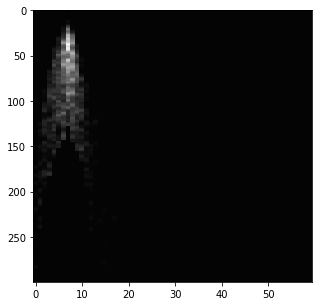

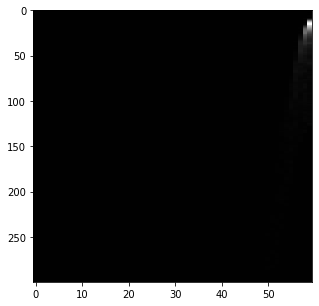

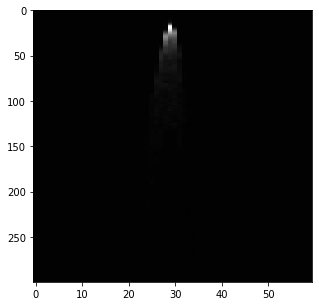

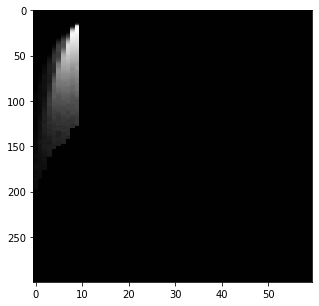

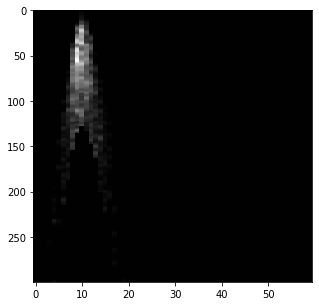

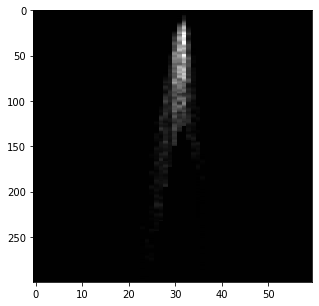

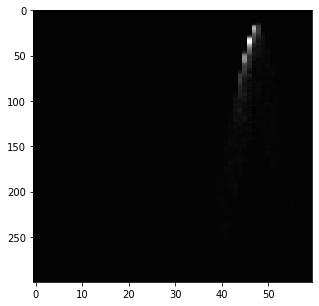

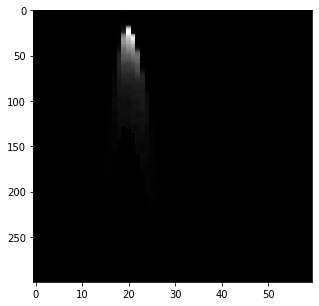

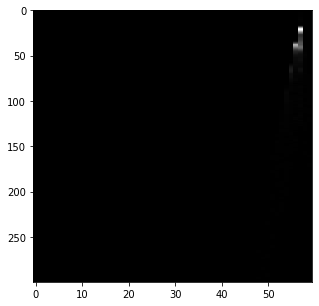

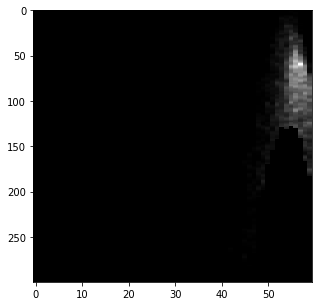

In [36]:
for i, im in enumerate(data_mix['image'][:10]):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'gray')
    print(np.max(im), data_mix['neutrino']['energy'][i])

In [37]:
print(data_mix.shape)#,label.shape)

(60000, 1)


In [45]:
train = np.zeros(lim3, bool)
test = np.zeros(lim3, bool)
valid = np.zeros(lim3, bool)

train[:40000] = 1 
test[40000:50000] = 1 
valid[50000:] = 1

In [46]:
print(valid)
print(valid.shape)
print(np.squeeze(data_mix).shape)
print(data_mix[valid].shape)
print(data_mix['image'].reshape(len(data_mix['image']),300,60,1).shape)
print(data_mix['image'][valid].reshape(len(data_mix['image'][valid]),300,60,1).shape)


[False False False ...  True  True  True]
(60000,)
(60000,)
(10000, 1)
(60000, 300, 60, 1)
(10000, 300, 60, 1)


In [47]:
mean = np.mean(data_mix['image'][train])
std = np.std(data_mix['image'][train])
print(mean,std)

0.0016014979 0.01681641


In [48]:
pos = 0
div = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_Network_mixed_div.npy', mode = 'w+', dtype =info_dtype, shape=(lim3,1))
for i in data_mix:
    #print(i['image'].shape)
    im = i['image']-mean
    #print(im.shape)
    im = im/std
    #print(im.shape)
    div[pos] = i 
    div['image'][pos] = im
    #print(div['image'].shape)
    pos = pos + 1

In [49]:
data_div = np.load('/fastio2/dasha/double_pulse/data_Network_mixed_div.npy', mmap_mode='r') #T,S,D

0.95244014 0.017618122
[(4294967284, 290849.2, [3007.1277, 1829.5198, 1947.0281], [1.126688  , 0.39706343], -2490.6155, 3620.5674)]
(300, 60)
15.640074 0.26461136
[(16, 95669.27, [2186.2239 ,  921.04803, 1947.5586 ], [0.86885685, 0.35720527], -3014.93, 3799.248)]
(300, 60)
14.084276 0.23844846
[(16, 388665.16, [ -712.5276, -7810.69  ,  1943.1747], [1.3345761, 4.6658187], -17836.28, 8263.411)]
(300, 60)


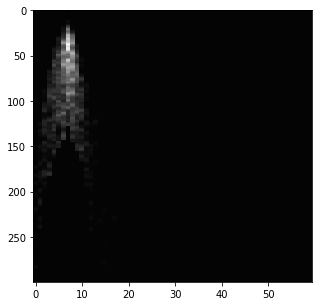

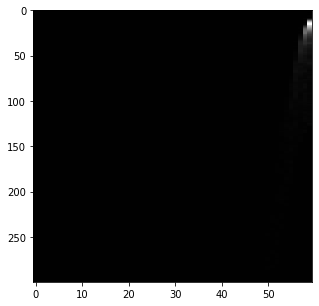

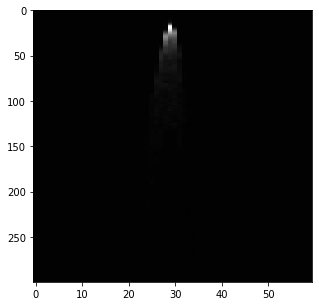

In [50]:
for i, im in enumerate(data_div['image'][:3]):
    print(np.max(im), np.max(data_mix['image'][i]))
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'gray')
    print(data_div['neutrino'][i])
    print(data_div['image'][i][0].shape)

In [51]:
print(data_div[valid]['image'].shape)

(10000, 1, 300, 60)


In [52]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [53]:
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras import optimizers
import tensorflow as tf
tf.__version__
with tf.device('/cpu:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (50, 10), activation='relu', input_shape=(300, 60, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (25, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (15, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.summary()
    
parallel_model = multi_gpu_model(model,gpus=2)
sgd = optimizers.SGD(lr=0.01)
parallel_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
history = parallel_model.fit(data_div[train]['image'].reshape(data_div[train]['image'].shape[0],300,60,1),label[train], epochs=300, validation_data=(data_div[valid]['image'].reshape(data_div[valid]['image'].shape[0],300,60,1),label[valid]), batch_size =512)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 251, 51, 32)       16032     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 25, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 101, 21, 64)       256064    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 10, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 8, 32)         92192     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 4, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

KeyboardInterrupt: 

In [ ]:
import json
history_dict = history.history # Get the dictionary containing each metric and the loss for each epoch
json.dump(history_dict, open('/data/dfc13/DoublePulse/Models/DP_model_NewFormat_Double_Single_Qs2000_400k.json', 'w')) # Save it under the form of a json file
#
model.save('/data/dfc13/DoublePulse/Models/DP_model_NewFormat_Double_Single_Qs2000_400k.h5') # Save the model
#
ResultsFile = open('/data/dfc13/DoublePulse/Models/DP_model_NewFormat_Double_Single_Qs2000_400k.txt','w') # File for saving the results of the fit.

# 8: multiple conv2d layers a la textbook (32 (3,3) then 64, 128, 128, dropout 0.3, dense 256(relu), 64(relu), 2(softmax)
# 8b: same as 8 but with 50 trials
# 8b[not c didn't update the line above]: same as 8b but with dropout 0.5.
# 8c: changed SGC "lr" from 0.01->0.001.  This smoothed things out a lot.  Sort of.  But had 0% accuracy for nutaus.
# 8d: changed SGC "lr" from 0.001->0.005.
# 8e: decreased size of training set to 24k, increased size of validation set to 4k (24k:28k) and increased test set (28k:)
# 8f: changed SGC "lr" from 0.005->0.01.  200 epochs. 97%/37%.
# 8g: lr=0.02, 50 epochs: 98%/29%.

# 9a: changed dense 256 -> 512.  50 epochs. 100%/22%
# 9b: same as above, 200 epochs. 97%/39%.
# 9c: same as above, lr = 0.01.  200 epochs. 97%/36%.
# 9d: same as above, 500 epochs batch_size = 64. 96%/40%.
# 10a: Testing selection of particular GPU.  20 epochs, batch_size = 128.
# 10b-3: Testing parallelization.  50 epochs, batch_size = 128, 3 GPUs (about 6s/epoch): 99%/19%.
# 10c-3: Testing parallelization.  50 epochs, batch_size = 64*3=192, 3 GPUs (about 4.5s/epoch): 100%/11%.
# 10d-3: Testing parallelization.  100 epochs, batch_size = 64*3=192, 3 GPUs (about 4s/epoch): 98%/29%.
# 10e-3: Testing parallelization.  500 epochs, batch_size = 64*3=192, 3 GPUs (about 4s/epoch): 98%/29%; 98%/56%.
# 10f-3: Parallel.  300 epochs, batch_size = 64*3=192, 3 GPUs. X%/Y%.

In [6]:
#import json
#with open('/data/dfc13/DoublePulse/Models/DP_model_NewFormat_Double_Single_600k_NO.json', 'r') as f:
#        history_dict = json.load(f)
#from keras.models import load_model
#model = load_model('/data/dfc13/DoublePulse/Models/DP_model_NewFormat_Double_Single_600k_NO.h5')

Using TensorFlow backend.
W0221 12:10:01.074048 139696329090816 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0221 12:10:01.095360 139696329090816 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0221 12:10:01.110813 139696329090816 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0221 12:10:01.147207 139696329090816 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph

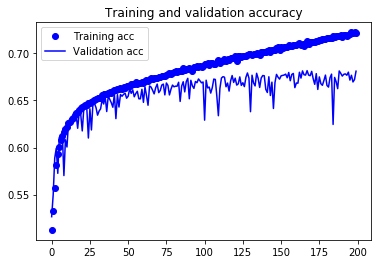

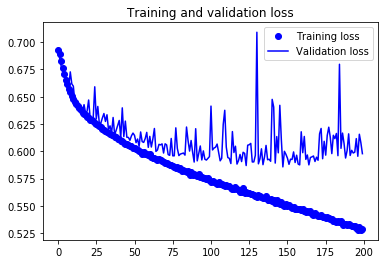

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
result = parallel_model.evaluate(data_div['image'][test].reshape(len(data_div['image'][test]),300,60,1),label[test])
print(result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_pred = parallel_model.predict(data_div['image'][test].reshape(len(data_div['image'][test]),300,60,1))
matrix = confusion_matrix(label[test].argmax(axis=1), test_pred.argmax(axis=1))
report = classification_report(label[test].argmax(axis=1), test_pred.argmax(axis=1))

In [34]:
#print("True Positive",tp)
#print("True Negative",tn)
#print("False Positive",fp)
#print("False Negative",fn)

#ResultsFile.write(repr(matrix))
#ResultsFile.write('\n')
#ResultsFile.write(report)
#ResultsFile.close()

print(matrix)
print(report)

[[ 9670  5445]
 [ 3905 10980]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.67     15115
           1       0.67      0.74      0.70     14885

    accuracy                           0.69     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.69      0.69      0.69     30000

